## Step-1: Business Problem
- Create a predictive model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [7]:
df=pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
 df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Step-3: Data Preprocessing
#### EDA

In [10]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [11]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [12]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [13]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [14]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


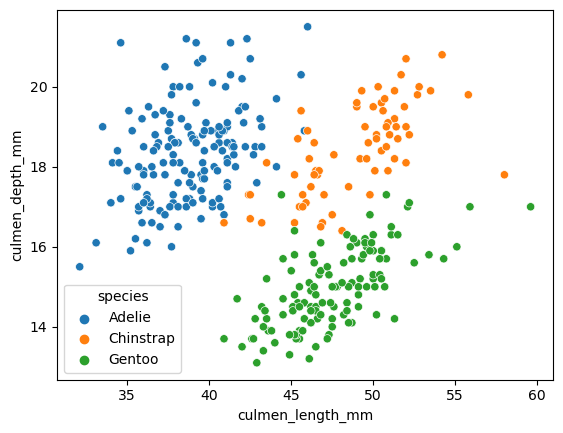

In [15]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,
                hue='species')
plt.show()

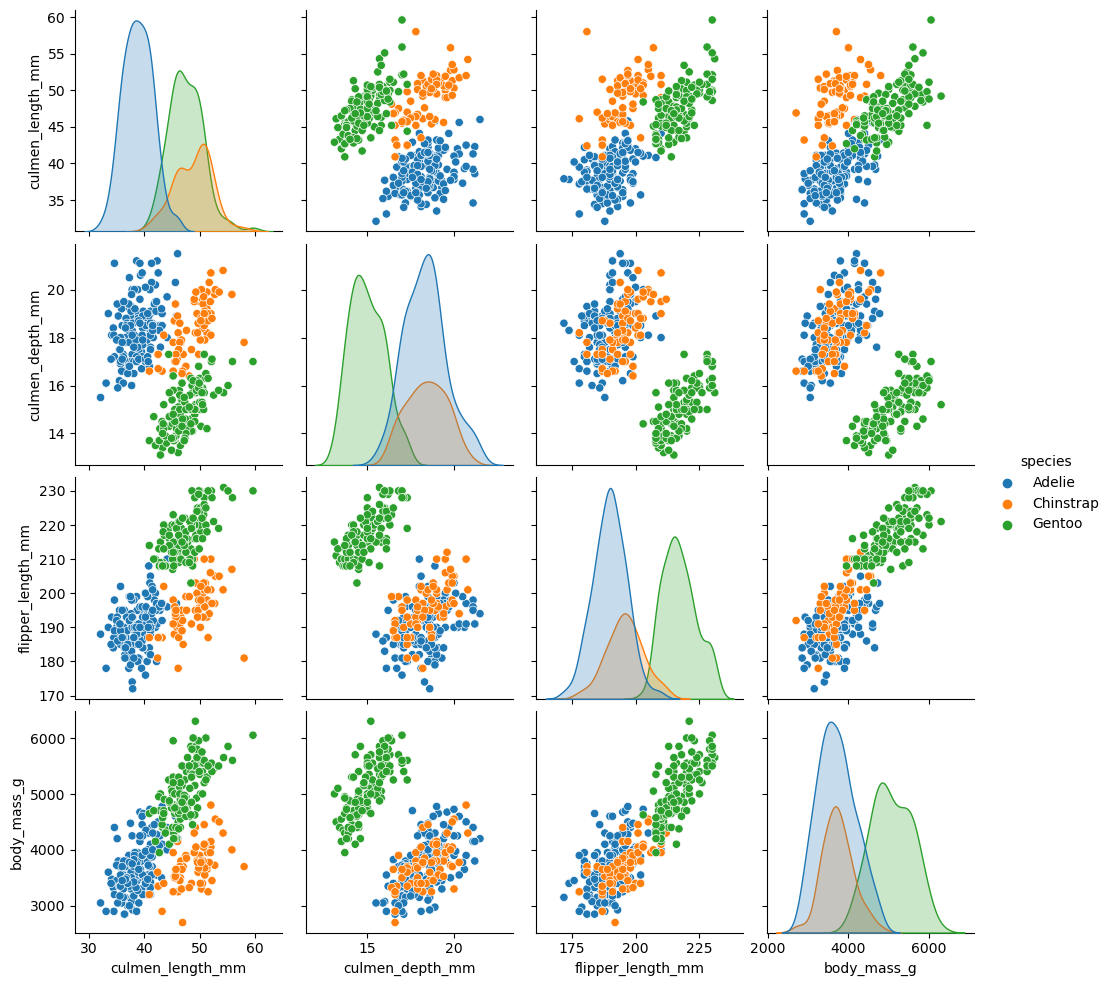

In [17]:
sns.pairplot(df,hue='species')
plt.show()

#### Data Cleaning

In [16]:
df['sex'].replace(".","MALE",inplace=True)

In [18]:
df.isna().sum()/len(df)*100

species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

In [20]:
#Coninuous variable with mean
#Discrete variable with mode

df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace=True)
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

#### Encoding

In [21]:
X=pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y=df['species']

In [23]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,1,1
4,36.70000,19.30000,193.000000,3450.000000,0,1,0
...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,0,0,1
340,46.80000,14.30000,215.000000,4850.000000,0,0,0
341,50.40000,15.70000,222.000000,5750.000000,0,0,1
342,45.20000,14.80000,212.000000,5200.000000,0,0,0


### Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                 random_state=6)

## Step-4,5: Modelling & Evaluation
#### Decision Tree Classfier-with default Hyperparameters

In [38]:
#Modelling
from sklearn.tree import DecisionTreeClassifier
dt_default_model=DecisionTreeClassifier(random_state=0,max_depth=3)
dt_default_model.fit(X_train,y_train)


#Prediction and Eval on Train
ypred_train = dt_default_model.predict(X_train)
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,ypred_train))


#CV Score
from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(dt_default_model,X,y,cv=5).mean())

#Predict and Eval on Test Data
ypred_test = dt_default_model.predict(X_test)
print("Test Accuracy:",accuracy_score(ypred_test,y_test))


Train Accuracy: 0.9709090909090909
CV Score: 0.9650468883205455
Test Accuracy: 1.0


### Visualize The Tree

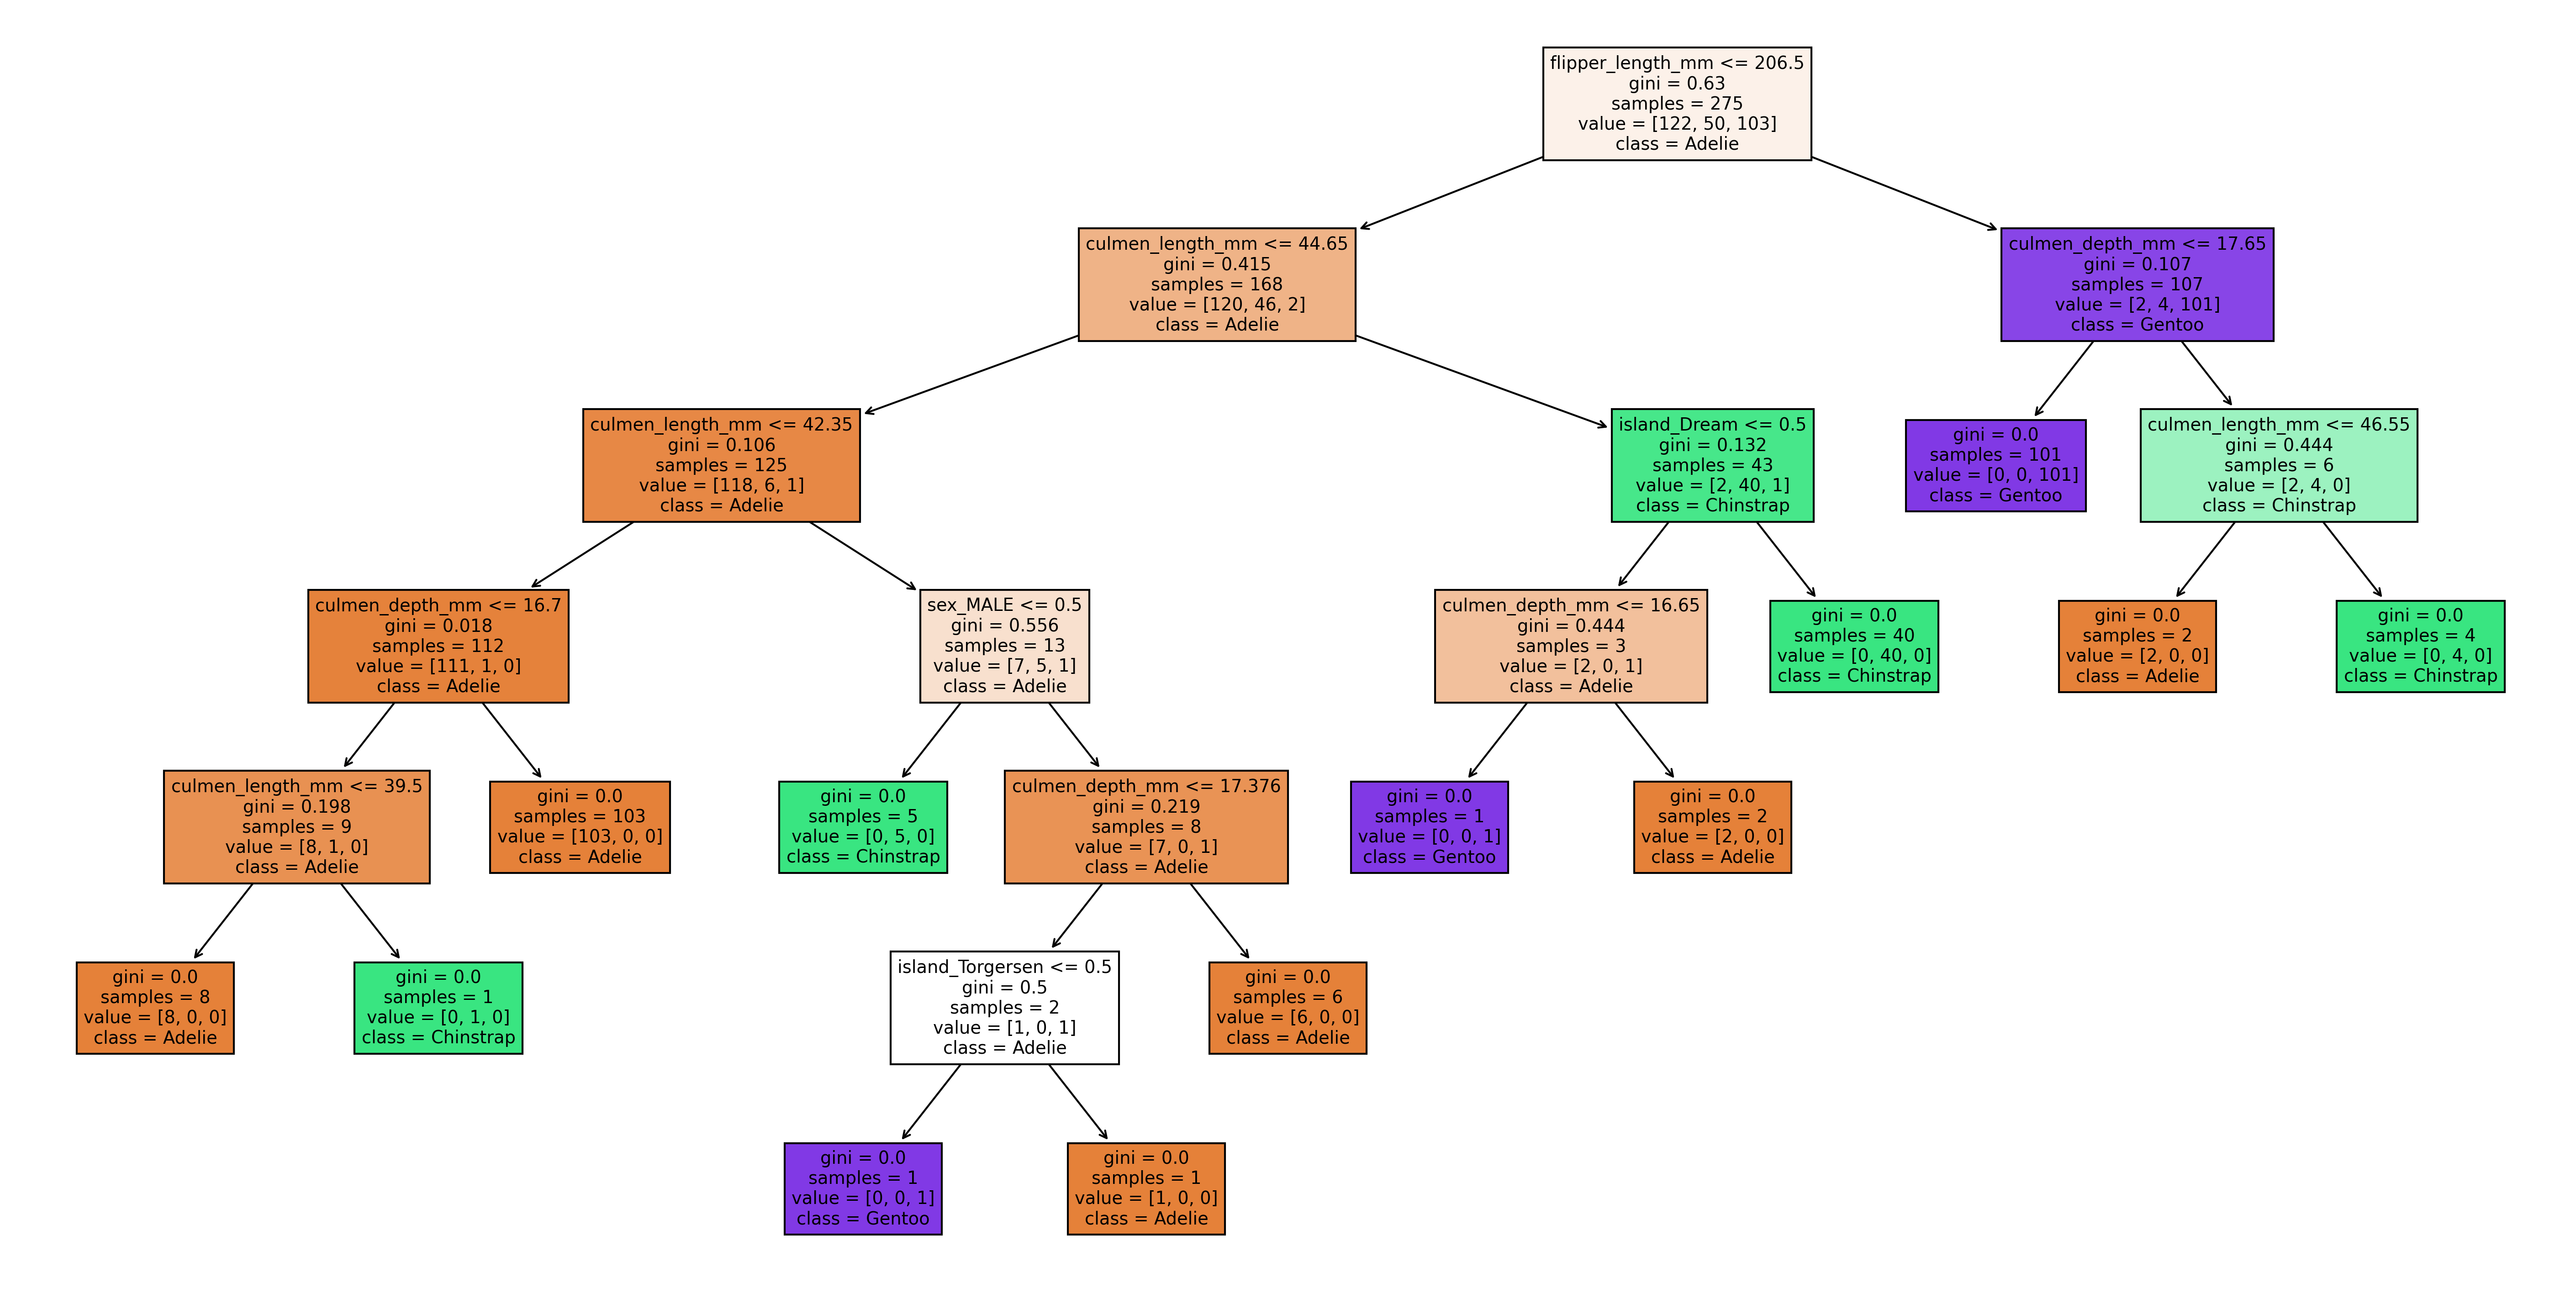

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi=300)
plot_tree(dt_default_model,filled=True,    #filled means colours
         feature_names=['culmen_length_mm','culmen_depth_mm','flipper_length_mm',
                       'body_mass_g','island_Dream','island_Torgersen',
                       'sex_MALE'],class_names=['Adelie','Chinstrap','Gentoo'])
plt.show()

In [33]:
dt_default_model.predict([[40,20,180,4000,0,0,1]])

array(['Adelie'], dtype=object)

#### Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=0)

param_grid={'criterion':['gini','entropy'],
            'max_depth':[1,2,3,4,5]}

grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [42]:
DecisionTreeClassifier(criterion='gini', max_depth= 5)

DecisionTreeClassifier(max_depth=5)

In [43]:
grid.best_estimator_.feature_importances_

array([0.34390987, 0.05670105, 0.5346114 , 0.00774261, 0.02520849,
       0.        , 0.03182658])

In [44]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                  index=X.columns,columns=['Feature Importance'])
feats

,Feature Importance
culmen_length_mm,0.343910
culmen_depth_mm,0.056701
flipper_length_mm,0.534611
body_mass_g,0.007743
island_Dream,0.025208
island_Torgersen,0.000000
sex_MALE,0.031827


In [45]:
feats_imp=feats[feats['Feature Importance']>0]
feats_imp

,Feature Importance
culmen_length_mm,0.343910
culmen_depth_mm,0.056701
flipper_length_mm,0.534611
body_mass_g,0.007743
island_Dream,0.025208
sex_MALE,0.031827


In [46]:
importance_features_list=feats_imp.index.to_list()
importance_features_list

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'island_Dream',
 'sex_MALE']

## Final Decision Tree Model
#### with best hyperparameters & with important features

In [53]:
X_imp=X[importance_features_list]

X_train,X_test,y_train,y_test = train_test_split(X_imp,y,train_size=0.8,
                                                 random_state=6)

final_dt_model=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5)
final_dt_model.fit(X_train,y_train)


#Prediction and Eval on Train
ypred_train = final_dt_model.predict(X_train)
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,ypred_train))


#CV Score
from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(final_dt_model,X_imp,y,cv=5).mean())

#Predict and Eval on Test Data
ypred_test = final_dt_model.predict(X_test)
print("Test Accuracy:",accuracy_score(ypred_test,y_test))


Train Accuracy: 0.9963636363636363
CV Score: 0.9737851662404091
Test Accuracy: 1.0


## Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[30,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 21]], dtype=int64)